In [4]:
using Distributions
using Optim
using PyPlot
# not really sure why plt[:style]... doesn't just work
matplotlib[:pyplot][:style][:use]("ggplot")

In [5]:
x = [0.4; 0.6]
t = [0.05; -0.35]
alpha = 2.
beta = 10.

10.0

In [6]:
mean(t), mean(x .* t)

(-0.15,-0.095)

In [7]:
function calc_pred_dist(x, xs, t, alpha, beta)
    N = length(xs)
    S_N = ([alpha 0; 0 alpha] + N * beta * [1 mean(xs); mean(xs) mean(xs .* xs)])^-1
    mx = N * beta * [1 x] * S_N * [mean(t); mean(xs .* t);]
    s2x = beta^-1 + [1 x] * S_N * [1; x]
    mx[1], s2x[1]
end

calc_pred_dist (generic function with 1 method)

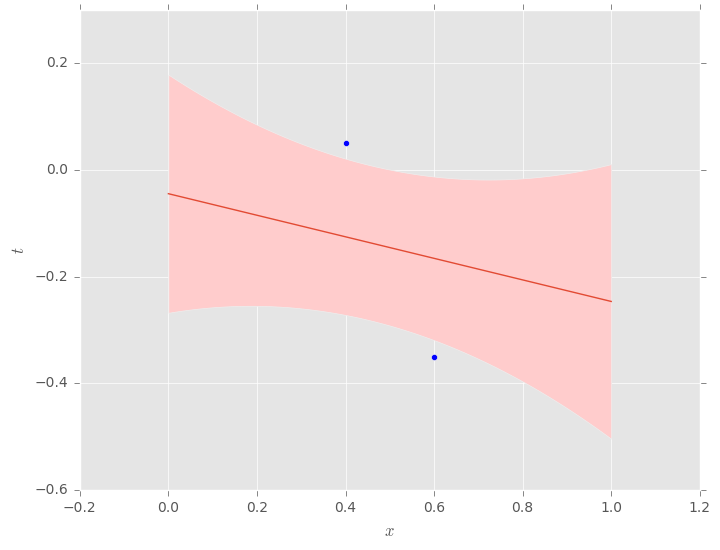

PyObject <matplotlib.text.Text object at 0x000000001AF93470>

  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Joris\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Joris\.juli

In [9]:
v = linspace(0, 1, 100)
pred_dist = [calc_pred_dist(v, x, t, alpha, beta) for v in vs]
mus = [d[1] for d in pred_dist]
stds = [d[2] for d in pred_dist]
fill_between(v, mus + stds, mus - stds, facecolor=(1.0, 0.8, 0.8))
plot(v, mus)
scatter(x, t)
xlabel(L"$x$")
ylabel(L"$t$")

In [14]:
function p_w(x, t, alpha, beta)
    N = length(x)
    S = ([alpha 0; 0 alpha] + N * beta * [1 mean(x); mean(x) mean(x .* x)])^-1
    m = N * beta * S * [mean(t); mean(x .* t)]
    m, S
end

p_w (generic function with 1 method)

(Any, Any, Any, Any) in module Main at In[12]:2 overwritten at In[14]:2.


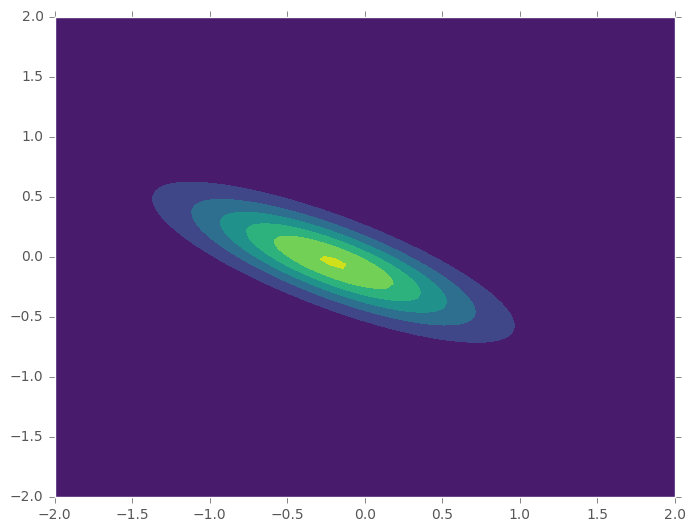

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000023AF2710>

In [35]:
m_N, S_N = p_w(x, t, alpha, beta)
weights_dist = MvNormal(m_N, S_N)

n = 100
w_0 = linspace(-2, 2, n)
w_1 = linspace(-2, 2, n)
xgrid = repmat(w_0', n, 1)
ygrid = repmat(w_1, 1, n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i:i,j:j] = pdf(weights_dist, [w_0[i];w_1[j]])
    end
end
contourf(xgrid, ygrid, z, cmap=ColorMap("viridis"))

In [43]:
function f(x, w)
    [1 x] * w
end

f (generic function with 1 method)

f(Any, Any) in module Main at In[41]:2 overwritten at In[43]:2.


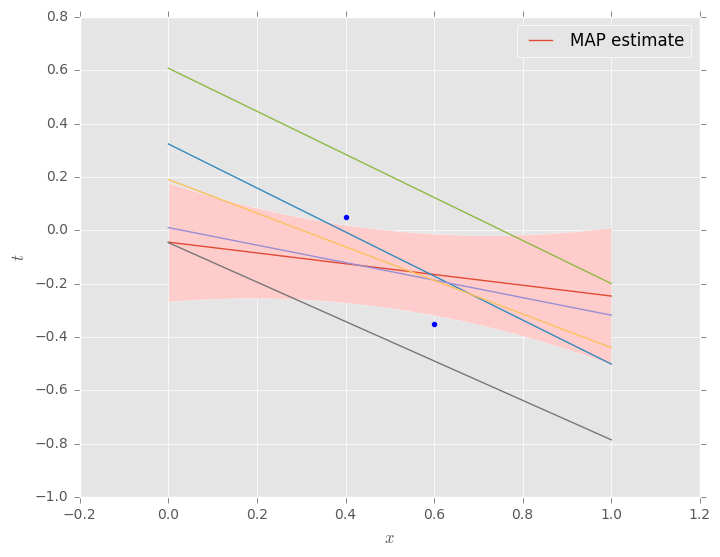

PyObject <matplotlib.legend.Legend object at 0x0000000023B81470>

In [46]:
vs = linspace(0, 1, 100)
pred_dist = [calc_pred_dist(v, x, t, alpha, beta) for v in vs]
mus = [d[1] for d in pred_dist]
stds = [d[2] for d in pred_dist]
fill_between(vs, mus + stds, mus - stds, facecolor=(1.0, 0.8, 0.8))
plot(vs, mus, label="MAP estimate")
for _ in 1:5
    w = rand(weights_dist)
    y = [f(v, w) for v in vs]
    plot(vs, y)
end
scatter(x, t)
xlabel(L"$x$")
ylabel(L"$t$")
legend()